In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import pandas as pd
import os
import sys
import scipy
from scipy import stats
import matplotlib.dates as mdates
from datetime import datetime
from iminuit import Minuit
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/visibuilt_day1 2024/'

data = read_csv_BC(path, parent_path, 0)

HEPA_keys = ['MA200-0285_240910101601', 'MA200-0353_240910103200', 'MA200-0369_240910101605']
conc_keys = ['Sample temp (C)', 'Sample RH (%)', 'Sample dewpoint (C)', 
             'UV BCc', 'Blue BCc', 'Green BCc', 'Red BCc', 'IR BCc']
ylabels = ['Sample T / $^{\circ}$C', 'Sample RH / %', 'Sample DP / $^{\circ}$C', 
           'UV BC / $\mu$g m$^{-3}$', 'Blue BC / $\mu$g m$^{-3}$', 'Green BC / $\mu$g m$^{-3}$', 
           'Red BC / $\mu$g m$^{-3}$', 'IR BC / $\mu$g m$^{-3}$']
colors = ['tab:red', 'tab:blue', 'tab:cyan', 'darkviolet', 'blue', 'green', 'red', 'k']
line_styles = ['-', ':', '--']

mask = data['MA200-0285_240910101601']['IR BCc'] < 1
data['MA200-0285_240910101601'] = data['MA200-0285_240910101601'][mask]

c:\Users\B363580\Documents\GitHub\Master-thesis\calibration\..\plot_functions.py:297: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha="left")
C:\Users\B363580\AppData\Local\Temp\ipykernel_17944\871869841.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


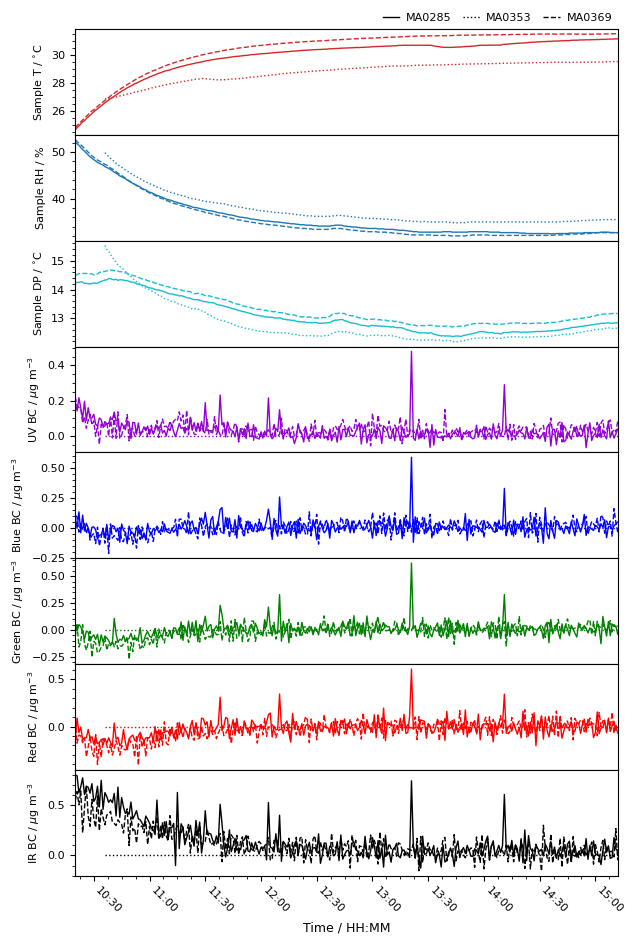

In [3]:
fig = plt.figure(figsize = (7, 11))
gs = fig.add_gridspec(8, hspace=0)
ax = gs.subplots(sharex=True)

for i, df_key in enumerate(conc_keys):
    for ls, dict_key in zip(line_styles, HEPA_keys):
        plot_total(ax[i], data[dict_key], df_key, colors[i], ls)
        ax[i].set_ylabel(ylabels[i], fontsize = 8)

ax[7].legend(labels = ['MA0285', 'MA0353', 'MA0369'], bbox_to_anchor = (0, 7.2, 1, 1), ncol = 3, fontsize = 8)

fig.tight_layout()
fig.savefig('HEPA_timeseries.png', dpi = 600)

Sample temp (C): f(x) = -0.11865436532645754x + 3.6979597137441087, R2 = 0.7157600274309929
Sample RH (%): f(x) = 0.035684400270121784x + -1.1332466313818284, R2 = 0.7190034438884495
Sample dewpoint (C): f(x) = 0.24722058991718548x + -3.0824918678003534, R2 = 0.5955415278656851
Sample temp (C): f(x) = -0.07370386021871228x + 2.3623524917432026, R2 = 0.6278304834882926
Sample RH (%): f(x) = 0.022822334665925023x + -0.6911000547830974, R2 = 0.6280741660525275
Sample dewpoint (C): f(x) = 0.17560302558299434x + -2.2216239583040043, R2 = 0.5574448241290141


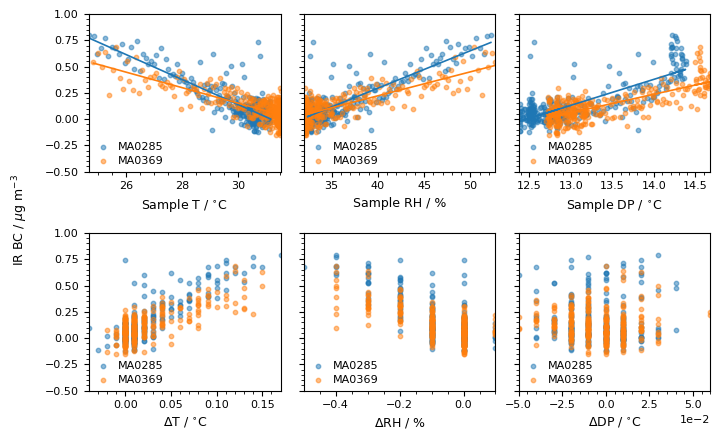

In [19]:
x_labels = [['Sample T / $^{\circ}$C', 'Sample RH / %', 'Sample DP / $^{\circ}$C'],
            ['$\Delta$T / $^{\circ}$C', '$\Delta$RH / %', '$\Delta$DP / $^{\circ}$C']]
guess = [[-0.11, 3.45],
         [0.035, -1.2],
         [0.2, -2.5]]

fig, axs = plt.subplots(2, 3, figsize = (7.3, 4.5), sharey=True)

for key, lbl in zip([HEPA_keys[0], HEPA_keys[2]], ['MA0285', 'MA0369']):
    df = data[key]

    MA_correction_multi(axs, df, conc_keys[:3], x_labels, guess, lbl)

for ax in axs.flatten():
    ax.set_ylim(-0.5, 1)
    ax.legend(fontsize = 8)

fig.supylabel('IR BC / $\mu$g m$^{-3}$', fontsize = 9)

fig.tight_layout()
fig.savefig('MA200_corr.png', dpi = 600)